# 1. 손글씨 인식 모델 만들기

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
digits = load_digits()

x_data = digits['data']
y_data = digits['target']

print(x_data.shape)
print(y_data.shape)

(1797, 64)
(1797,)


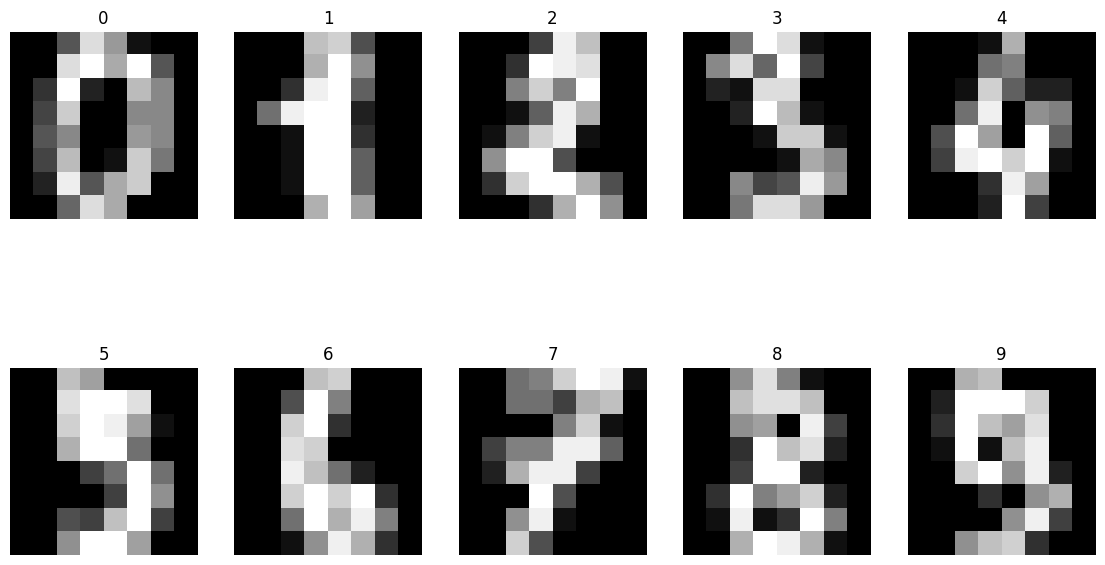

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 8))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_data[i].reshape((8, 8)), cmap='gray')
    ax.set_title(y_data[i])
    ax.axis('off')

In [ ]:
x_data = torch.FloatTensor(x_data)
y_data = torch.LongTensor(y_data)

print(x_data.shape)
print(y_data.shape)

torch.Size([1797, 64])
torch.Size([1797])


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=2023)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([1437, 64]) torch.Size([1437])
torch.Size([360, 64]) torch.Size([360])


# 2. 데이터 로더
* 데이터의 양이 많을 때 배치 단위로 학습하는 방법

<img src='https://i.imgur.com/t83RUtL.png' width='700'>

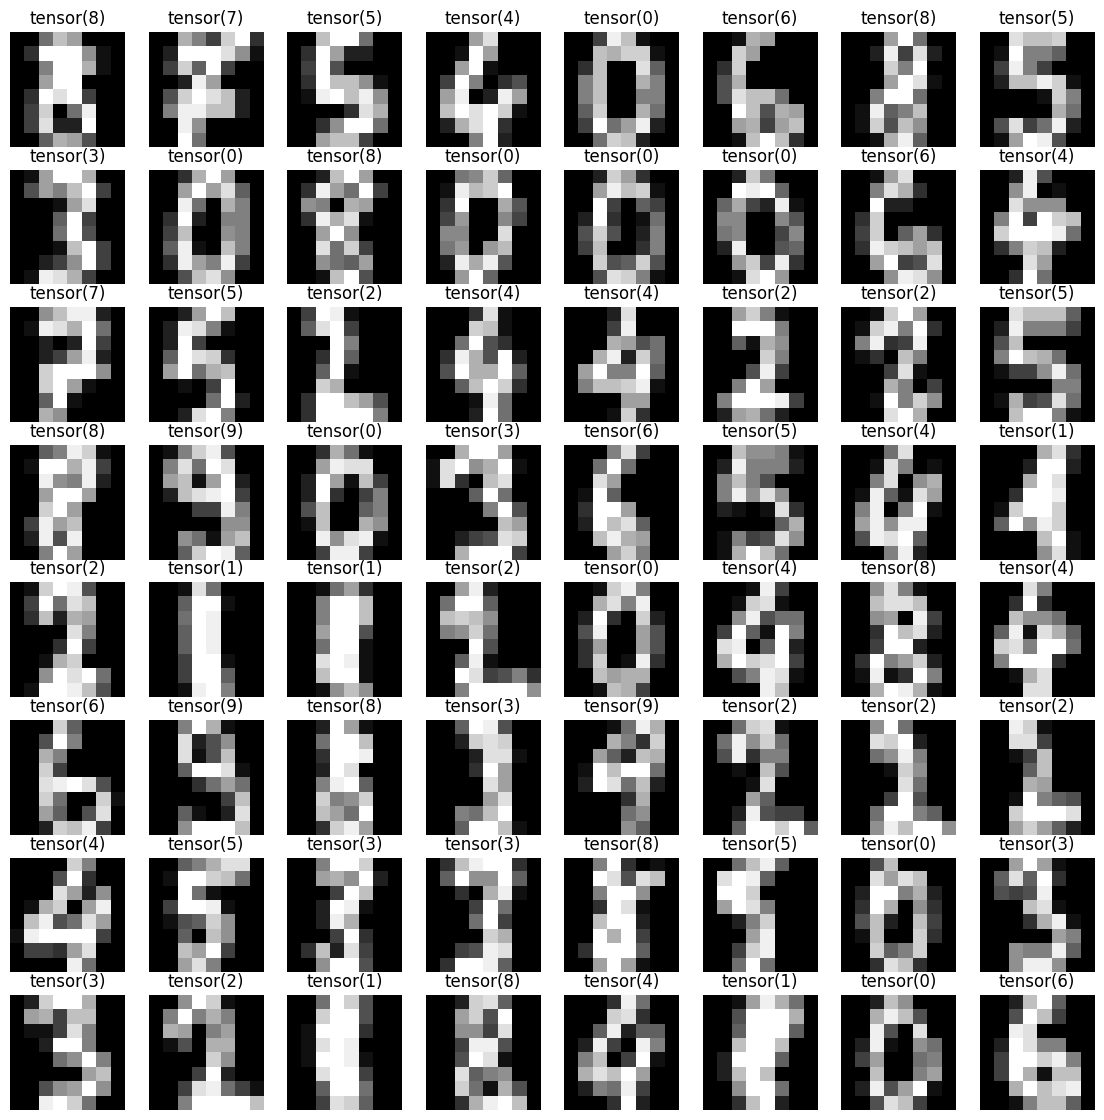

In [ ]:
loader = torch.utils.data.DataLoader(
    dataset=list(zip(x_train, y_train)),
    batch_size=64,
    shuffle=True
)

imgs, labels = next(iter(loader))

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14, 14))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((8, 8)), cmap='gray')
    ax.set_title(str(label))
    ax.axis('off')

In [ ]:
model = nn.Sequential(
    nn.Linear(64, 10)  # 8x8 픽셀이라 64개이지만, 입력은 일렬로 64개가 들어감
)

optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 50

for epoch in range(epochs + 1):
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in loader:
        y_pred = model(x_batch)
        loss = nn.CrossEntropyLoss()(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss

        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100

        sum_accs = sum_accs + acc

    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)

    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    0/50 Loss: 1.925093 Accuracy: 58.12%
Epoch    1/50 Loss: 0.289274 Accuracy: 91.19%
Epoch    2/50 Loss: 0.190857 Accuracy: 93.95%
Epoch    3/50 Loss: 0.139218 Accuracy: 95.98%
Epoch    4/50 Loss: 0.119592 Accuracy: 96.74%
Epoch    5/50 Loss: 0.091412 Accuracy: 97.35%
Epoch    6/50 Loss: 0.085250 Accuracy: 97.85%
Epoch    7/50 Loss: 0.082293 Accuracy: 97.21%
Epoch    8/50 Loss: 0.069902 Accuracy: 98.56%
Epoch    9/50 Loss: 0.064019 Accuracy: 98.51%
Epoch   10/50 Loss: 0.052984 Accuracy: 98.71%
Epoch   11/50 Loss: 0.052293 Accuracy: 98.85%
Epoch   12/50 Loss: 0.063801 Accuracy: 98.34%
Epoch   13/50 Loss: 0.058033 Accuracy: 98.44%
Epoch   14/50 Loss: 0.043342 Accuracy: 99.05%
Epoch   15/50 Loss: 0.046098 Accuracy: 99.17%
Epoch   16/50 Loss: 0.043389 Accuracy: 98.91%
Epoch   17/50 Loss: 0.042767 Accuracy: 99.12%
Epoch   18/50 Loss: 0.039321 Accuracy: 99.25%
Epoch   19/50 Loss: 0.028966 Accuracy: 99.24%
Epoch   20/50 Loss: 0.027437 Accuracy: 99.73%
Epoch   21/50 Loss: 0.028686 Accur

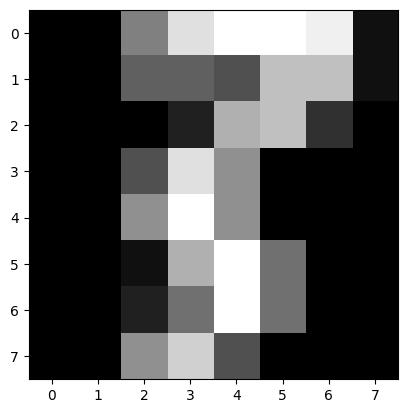

In [ ]:
plt.imshow(x_test[10].reshape((8, 8)), cmap='gray')

In [ ]:
y_pred = model(x_test)
y_pred[10]

tensor([-1.5412e+01,  1.0789e-02, -3.0371e+00,  1.0728e+01, -1.2487e+01,
         2.4962e+00, -6.5355e+00,  2.5459e+00,  5.4416e+00,  2.6782e+00],
       grad_fn=<SelectBackward0>)

In [ ]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[10]

tensor([4.4181e-12, 2.2033e-05, 1.0456e-06, 9.9409e-01, 8.2303e-11, 2.6451e-04,
        3.1626e-08, 2.7800e-04, 5.0306e-03, 3.1733e-04],
       grad_fn=<SelectBackward0>)

In [ ]:
for i in range(10):
    print(f'숫자 {i}일 확률: {y_prob[0][i]:.2f}')

숫자 0일 확률: 0.00
숫자 1일 확률: 0.00
숫자 2일 확률: 0.00
숫자 3일 확률: 0.00
숫자 4일 확률: 0.00
숫자 5일 확률: 0.99
숫자 6일 확률: 0.01
숫자 7일 확률: 0.00
숫자 8일 확률: 0.00
숫자 9일 확률: 0.00


In [ ]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy:.2f}% 입니다!')

테스트 정확도는 97.50% 입니다!
